In [1]:
# Importing packages...

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# Importing the dataset.

# https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
df = pd.read_csv('kc_house_data.csv')

In [3]:
# Checking everything was imported ok.
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# This project is divided in four parts:
# 1 - Introduction
# 2 - Data Exploration
# 3 - Model Building
# 4 - Conclusion

In [5]:
# 1 - Introduction

# Given a bunch of independent variables, using machine learning we can try and predict the dependent variable. In
# this project we will split the data into training data and testing data. During the model fitting part, we will use
# the training data so that the model can learn the impact of the input variables towards predicting the output 
# variable. For our specific project we will look for the impact of variables such as number of bathrooms, square 
# footage and etc, to predict the price of the house. To evaluate the effectiveness of the model we will use the input
# variables that were split into the training dataset and using our model predict the output variable. Lastly, we 
# compare the predicted values with the actual output variables that were split into the testing dataset.

In [6]:
# 1 - Introduction

# Independent Variables:
# id - Unique ID for each home sold
# date - Date of the home sale
# bedrooms - Number of bedrooms
# bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
# sqft_living - Square footage of the apartments interior living space
# sqft_lot - Square footage of the land space
# floors - Number of floors
# waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
# view - An index from 0 to 4 of how good the view of the property was
# condition - An index from 1 to 5 on the condition of the apartment
# grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of 
# construction and design, and 11-13 have a high quality level of construction and design.
# sqft_above - The square footage of the interior housing space that is above ground level
# sqft_basement - The square footage of the interior housing space that is below ground level
# yr_built - The year the house was initially built
# yr_renovated - The year of the house’s last renovation
# zipcode - What zipcode area the house is in
# lat - Lattitude
# long - Longitude
# sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
# sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# Dependent Variable:
# price - Price of each home sold

In [7]:
# 2 - Data Exploration

# Dropping columns I'm not interested in.
df = df.drop(['id','date'], axis = 1)

In [8]:
# 2 - Data Exploration

# Checking the datatypes.
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
# 2 - Data Exploration

# Descriptive statistics to have a feel for possible outliers and incorrect input.
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
# 2 - Data Exploration

# Taking a look at the size of the dataset.
df.shape

# 21.613 rows and 21 columns.

(21613, 19)

In [11]:
# 2 - Data Exploration

# Missing data handling by dropping rows with a blank column.
df.dropna()

# As we can see from the output, no row was removed, as size is still (21.613, 21).

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [12]:
# 2 - Data Exploration

# Checking if the categorical variables are within the domain of the definitions set by the dataset owner. If a row is
# not within the domain it is dropped.
df.drop(df[df['waterfront'] < 0].index, inplace = True)
df.drop(df[df['waterfront'] > 1].index, inplace = True)
df.drop(df[df['view'] < 0].index, inplace = True)
df.drop(df[df['view'] > 4].index, inplace = True)
df.drop(df[df['condition'] < 1].index, inplace = True)
df.drop(df[df['condition'] > 5].index, inplace = True)
df.drop(df[df['grade'] < 1].index, inplace = True)
df.drop(df[df['grade'] > 13].index, inplace = True)

df.shape
# Again, no rows were dropped.

(21613, 19)

In [13]:
# 2 - Data Exploration

# There are 19 variables. 18 input variables and 1 output.

# bedrooms - numerical
# bathrooms - numerical
# sqft_living - numerical
# sqft_lot - numerical
# floors - numerical
# waterfront - categorical (binary)
# view - categorical
# condition - categorical
# grade - categorical
# sqft_above - numerical
# sqft_basement - numerical
# yr_built - numerical
# yr_renovated - numerical
# zipcode - categorical
# lat - categorical
# long - categorical
# sqft_living15 - numerical
# sqft_lot15 - numerical
# price - numerical

# As we can see there are categorical and numerical variables. The output variable is numerical.

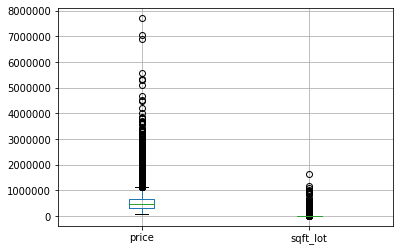

In [14]:
# 2 - Data Exploration

# Boxplot to take a look at the output variable (price) and sqft_loft.
df.boxplot(column = ['price', 'sqft_lot'])

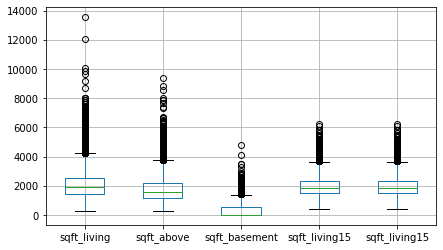

In [15]:
# 2 - Data Exploration

# Boxplot to take a look at some numerical input variables.
plt.figure(figsize=(7,4))
df.boxplot(column = ['sqft_living','sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_living15'])

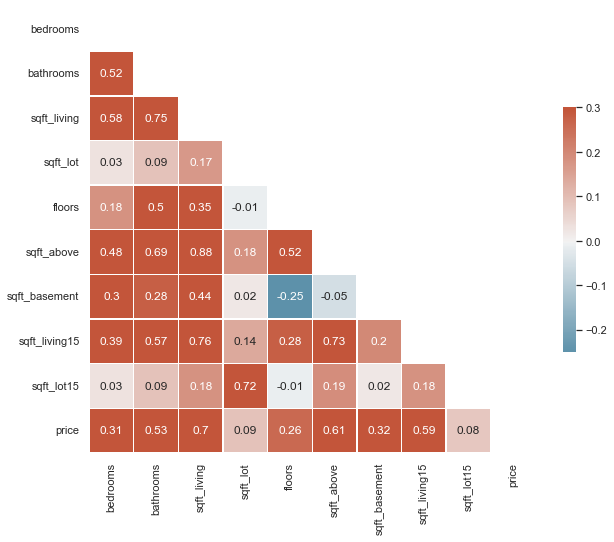

In [16]:
# 2 - Data Exploration

# Subset of the variables that I want in the Correlation Matrix.
df_corr = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
              'sqft_living15', 'sqft_lot15', 'price']]

# Correlation Matrix to better understand the relationships between the variables.
corrMatrix = df_corr.corr().round(2)

sns.set_theme(style="white")
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
f, ax = plt.subplots(figsize=(10, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corrMatrix, mask=mask, cmap=cmap, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# The last line shows us how the input variables interact with the output variable.

In [17]:
# 3 - Model Building

# Splitting x and y variables.
x_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
             'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
             'sqft_living15', 'sqft_lot15']
x = df[x_columns]
y = df.price

In [18]:
# 3 - Model Building

# Data Normalization applied to the x variables for computational efficiency.
norm = preprocessing.normalize(x, axis = 0)
x = pd.DataFrame(norm, columns=x.columns)
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.005836,0.003022,0.003530,0.000872,0.004281,0.0,0.0,0.005879,0.006147,0.004073,0.000000,0.006746,0.000000,0.006809,0.006795,-0.006804,0.004337,0.001275
1,0.005836,0.006800,0.007689,0.001117,0.008562,0.0,0.0,0.005879,0.006147,0.007490,0.005134,0.006732,0.032996,0.006805,0.006825,-0.006808,0.005470,0.001724
2,0.003890,0.003022,0.002304,0.001543,0.004281,0.0,0.0,0.005879,0.005268,0.002658,0.000000,0.006670,0.000000,0.006799,0.006827,-0.006803,0.008804,0.001819
3,0.007781,0.009067,0.005864,0.000771,0.004281,0.0,0.0,0.009799,0.006147,0.003624,0.011680,0.006781,0.000000,0.006806,0.006796,-0.006812,0.004402,0.001128
4,0.005836,0.006045,0.005026,0.001247,0.004281,0.0,0.0,0.005879,0.007025,0.005798,0.000000,0.006857,0.000000,0.006802,0.006810,-0.006793,0.005826,0.001693


In [19]:
# 3 - Model Building

# Splitting x and y into Training Data and Testing Data. 70% will be Training Data and 30% Testing Data.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state = 1234)

In [20]:
# 3 - Model Building

# Multiple Linear Regression

# Building a Linear Regression model based on the x and y values of the Training Data.
LR = LinearRegression()
LR.fit(x_train,y_train)

# Applying the created model now using the x values of the Testing Data, and storing the predicted values for y.
y_pred =  LR.predict(x_test)

In [21]:
# 3 - Model Building

# Multiple Linear Regression

# Now that the model has made its predictions, we analyze the results with R2, MSE and RMSE.
print("R2:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2: 0.7020594167729733
MSE: 38701952858.56639
RMSE 196728.11913543622


In [22]:
# 3 - Model Building

# K-Nn Regression

# Building a Linear Regression model based on the x and y values of the Training Data.
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(x_train, y_train)

# Applying the created model now using the x values of the Testing Data, and storing the predicted values for y.
y_pred = knn_model.predict(x_test)

In [23]:
# 3 - Model Building

# K-Nn Regression

# Now that the model has made its predictions, we analyze the results with R2, MSE and RMSE.
print("R2:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2: 0.5992741873227685
MSE: 52053571700.32581
RMSE 228152.5185053319


In [24]:
# 3 - Model Building

# K-Nn Regression

# Before moving, I want to take a look at the results of the K-Nn model with different nearest neighbors (k values).
parameters = {"n_neighbors": range(1, 40)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(x_train, y_train)

gridsearch.best_params_

{'n_neighbors': 5}

In [25]:
# 3 - Model Building

# K-Nn Regression

# Building a Linear Regression model based on the x and y values of the Training Data.
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)

# Applying the created model now using the x values of the Testing Data, and storing the predicted values for y.
y_pred = knn_model.predict(x_test)

# Analyzing the results with R2, MSE and RMSE.
print("R2:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2: 0.6170778675791715
MSE: 49740905240.022675
RMSE 223026.6917658572


In [26]:
# 4 - Conclusion

# Looking at the results of the Multiple Linear Regression and the K-Nn Regression models, their R2 values were not as
# high as we would like them to be. MLR had a R2 of 70.2% whilst K-Nn with k=5 had a R2 of 61,7%. What that means is
# that our MLR model 70.2% of the variability observed in the target variable (price) is explained by the regression
# model. Since the R2 value is significantlly higher I would recommend the use of the MLR model for this dataset.